<br>
<font>
<div dir=ltr align=center>
<font color=white size=15>
    Numerical Computations <br>
<font color=Red size=6>
<font color=white size=3>
    Samira Hossein Ghorban <br>
    Department of Computer Engineering <br>
    Sharif University of Technology (SUT) <br>
    Tehran, Iran <br>

<font color=696880 size=2>
........
<!-- <img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=center class="saturate" > -->
</br>
<font color='seablue' size=4>
Name: Parham Rezaei
</br>
STDID: 400108547

In computational science and engineering, solving non-linear ordinary differential equations (ODEs) is a critical task. These equations often model complex phenomena in various fields such as physics, biology, and engineering. The challenge lies in the fact that non-linear ODE systems do not generally have analytical solutions, necessitating the use of numerical methods.

Your task is to apply numerical methods to solve a complex system of non-linear ODEs. This involves first determining initial conditions from a set of non-linear equations and then using these conditions to solve the ODE system. 

### **Non-linear System of Equations for Initial Conditions:**

   Solve the following non-linear system of equations to find the initial conditions for the ODE system:

   $$
   x^3 + y - 10 = 0
   $$
   $$
   e^{-x} + \sin(z) - 1 = 0
   $$
   $$
   y^2 - z + 2 = 0
   $$

   Implement solvers for this system using the Newton-Raphson method.

#### **Newton-Raphson Method**
    
In the Newton-Raphson method, we iterate using the formula:
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \cdot F(\mathbf{x}_n)
$$

where $ \mathbf{x}_n $ is the vector of variables at the nth iteration, $J$ is the Jacobian matrix, and $F$ is the vector of functions.

Start with an initial guess $x_{0}=1, y_{0}=1, z_{0}=1$

Generate three subplots showing how the estimated values of $x$, $y$ and $z$ change with each iteration.



Iteration 0 : ((1, 1, 1))
 f1: -8, f2: 0.20935042597933884, f3: 2
--------------------------------------------------------------------------------
Iteration 1 : ((3.752253770871147, 0.743238687386558, 2.486477374773116))
 f1: 43.57275180164638, f2: -0.36728453716209497, f3: 0.06592637165497761
--------------------------------------------------------------------------------
Iteration 2 : ((2.7286030727304054, 0.40767548023031164, 2.0535966311840292))
 f1: 10.722874981775124, f2: -0.048991215619930584, f3: 0.11260266599698587
--------------------------------------------------------------------------------
Iteration 3 : ((2.25686133878361, 0.22154092887326826, 2.0144343119571424))
 f1: 1.7166906109640934, f2: 0.007874638126289968, f3: 0.034646071208888074
--------------------------------------------------------------------------------
Iteration 4 : ((2.1428139058883033, 0.24752580637717192, 2.0605938109637765))
 f1: 0.08658035286204324, f2: -0.0002476115620084762, f3: 0.000675213858892798

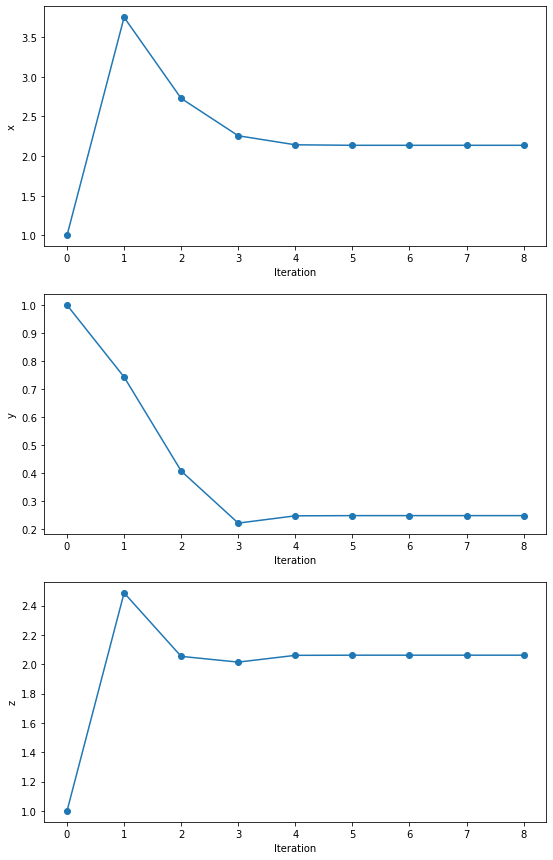

In [1]:
import numpy as np
from numpy import exp,sin,cos
from numpy.linalg import inv
_x = 0
_y = 1
_z = 2
f1 = lambda x,y,z: x**3+y-10
f2 = lambda x,y,z: exp(-x)+sin(z)-1
f3 = lambda x,y,z: y**2-z+2
df1 = [lambda x,y,z: 3*x**2, lambda x,y,z: 1, lambda x,y,z: 0]
df2 = [lambda x,y,z: -exp(-x), lambda x,y,z: 0, lambda x,y,z: cos(z)]
df3 = [lambda x,y,z: 0, lambda x,y,z: 2*y, lambda x,y,z: -1]
Jacobian = lambda x,y,z: np.array([[df1[_x](x,y,z),df1[_y](x,y,z),df1[_z](x,y,z)],
                                   [df2[_x](x,y,z),df2[_y](x,y,z),df2[_z](x,y,z)],
                                   [df3[_x](x,y,z),df3[_y](x,y,z),df3[_z](x,y,z)]])
F = lambda x,y,z: np.array([[f1(x,y,z)],[f2(x,y,z)],[f3(x,y,z)]])
X = [[1],[1],[1]]
ITERATIONS = 20
TOLERANCE = 1e-10
xvals = [1]
yvals = [1]
zvals = [1]
for i in range(ITERATIONS):
    x = X[0][0]
    y = X[1][0]
    z = X[2][0]
    print(f"Iteration {i} : ({x,y,z})\n f1: {f1(x,y,z)}, f2: {f2(x,y,z)}, f3: {f3(x,y,z)}")
    FormerX = X.copy()
    X = X-np.linalg.inv(Jacobian(x,y,z))@F(x,y,z)
    xvals.append(X[0][0])
    yvals.append(X[1][0])
    zvals.append(X[2][0])
    if np.linalg.norm(X-FormerX) < TOLERANCE:
        break
    print("-"*80)
print(f"Converged with values ({X[0][0]},{X[1][0]},{X[2][0]}) in {i} iterations. The tolerance was {TOLERANCE}.")
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,1,figsize=(9,15))
ax[0].plot(xvals,marker='o')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('x')
ax[1].plot(yvals,marker='o')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('y')
ax[2].plot(zvals,marker='o')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('z')
INITIAL_X = X[0][0]
INITIAL_Y = X[1][0]
INITIAL_Z = X[2][0]

### **Non-linear ODE System:**

   Once you have the initial conditions from the Newton-Raphson method, use them to solve the non-linear ODE system:   
   $$ 
    \frac{dx}{dt} = yz - x 
   $$
   
   $$  \frac{dy}{dt} = x^2 - \cos(z)  $$
   $$ \frac{dz}{dt} = e^{-y} - xz  $$

   The solution to the ODE system using different numerical methods (Euler, Improved Euler, and 4th-order Runge-Kutta) can be interpreted from the final values of the variables $x$, $y$, and $z$ at the end of the time interval (from $ t = 0 $ to $ t = 10 $).
   at the end, show the final values of $x$, $y$, and $z$ at $ t = 10 $.   
   Let the time step dt be 0.1.   


#### **1. Euler's Method**

Euler's method is the simplest form of a numerical method for solving ordinary differential equations. The formulation is as follows:

Given a differential equation of the form $\frac{dy}{dt} = f(t, y)$ with an initial condition $y(t_0) = y_0$, the Euler method creates a sequence of approximations for $y$ at discrete time steps. For a step size $dt$, the formulation is:

$$
y_{n+1} = y_n + dt \cdot f(t_n, y_n)
$$

where $y_n$ is the approximation of $y$ at time $t_n$.


#### **2. Improved Euler's Method (Heun's Method)**

Improved Euler's Method, also known as Heun's Method, is a simple modification of Euler's method that generally gives better accuracy. It uses an average of the slopes at the beginning and the end of the interval to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + dt, y_n + dt \cdot k_1) \\
y_{n+1} &= y_n + \frac{dt}{2} \cdot (k_1 + k_2)
\end{align*}
$$


#### **3. Runge-Kutta 4th Order Method**
    
The 4th Order Runge-Kutta Method (RK4) is a much more accurate method compared to Euler's and Improved Euler's methods. It involves calculating four intermediate slopes and taking a weighted average of these slopes to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_1\right) \\
k_3 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_2\right) \\
k_4 &= f(t_n + dt, y_n + dt \cdot k_3) \\
y_{n+1} &= y_n + \frac{dt}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

Each of these methods offers different levels of accuracy and computational complexity. Euler's method is the simplest but least accurate, Improved Euler's method offers a better balance, and RK4 provides high accuracy at the cost of increased computational efforts.

In [2]:
def dfxyz(values):
    x = values[0]
    y = values[1]
    z = values[2]
    dxdt = lambda x,y,z: y*z-x
    dydt = lambda x,y,z: x**2 - cos(z)
    dzdt = lambda x,y,z: exp(-y)-x*z
    return np.array([dxdt(x,y,z),dydt(x,y,z),dzdt(x,y,z)])

Euler Method

solution to the ODE using Euler
[[ 2.13645276e+00  2.48310029e-01  2.06165787e+00]
 [ 1.97400052e+00  7.51891659e-01  1.69920621e+00]
 [ 1.90436237e+00  1.15436519e+00  1.41093020e+00]
 [ 1.87679900e+00  1.50110619e+00  1.17376372e+00]
 [ 1.86531350e+00  1.81467529e+00  9.75760212e-01]
 [ 1.85585094e+00  2.10656087e+00  8.10039421e-01]
 [ 1.84090558e+00  2.38203215e+00  6.71873743e-01]
 [ 1.81685751e+00  2.64265982e+00  5.57424399e-01]
 [ 1.78248007e+00  2.88789490e+00  4.63265500e-01]
 [ 1.73801827e+00  3.11615862e+00  3.86258681e-01]
 [ 1.68458077e+00  3.32559687e+00  3.23558929e-01]
 [ 1.62372535e+00  3.51456712e+00  2.72647919e-01]
 [ 1.55717676e+00  3.68190939e+00  2.31353454e-01]
 [ 1.48664133e+00  3.82705364e+00  1.97845118e-01]
 [ 1.41369358e+00  3.95001465e+00  1.70610012e-01]
 [ 1.33971543e+00  4.05131946e+00  1.48416426e-01]
 [ 1.26587212e+00  4.13190256e+00  1.30272789e-01]
 [ 1.19311236e+00  4.19299313e+00  1.15387151e-01]
 [ 1.12218287e+00  4.23600981e+00  1.03130269e-01]

Text(0, 0.5, 'z')

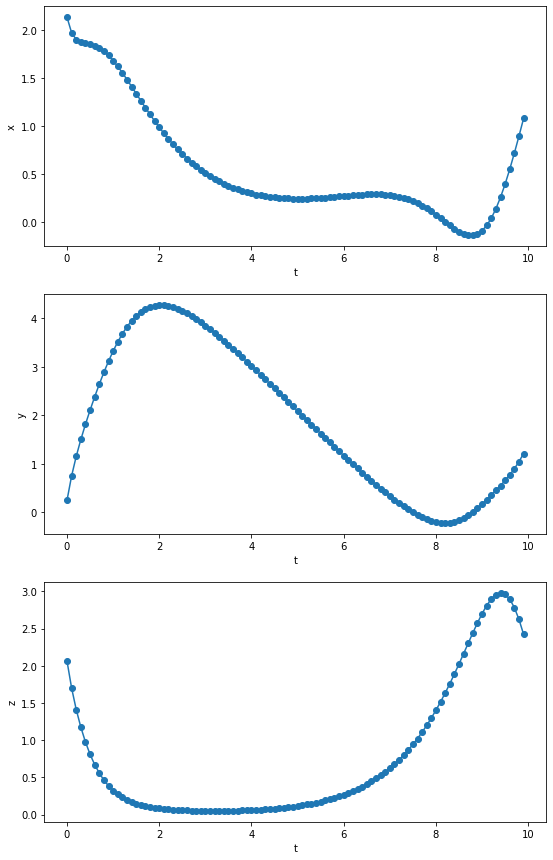

In [3]:
def euler(initial_values, f, t0, t1, dt):
    t = np.arange(t0, t1, dt)
    y = np.zeros((len(t), len(initial_values)))
    y[0] = initial_values
    for i in range(1, len(t)):
        y[i] = y[i-1] + f(y[i-1]) * dt
    return t, y
print("solution to the ODE using Euler")
euler_t, euler_y = euler([INITIAL_X, INITIAL_Y, INITIAL_Z], dfxyz, 0, 10, 0.1)
print(euler_y)
fig,ax = plt.subplots(3,1,figsize=(9,15))
ax[0].plot(euler_t,euler_y[:,0],marker='o')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[1].plot(euler_t,euler_y[:,1],marker='o')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[2].plot(euler_t,euler_y[:,2],marker='o')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')



Heun Method

solution to the ODE using Heun's Method
[[ 2.13645276  0.24831003  2.06165787]
 [ 2.02040756  0.70133761  1.73629404]
 [ 1.96406304  1.0951194   1.46269199]
 [ 1.93841537  1.45072575  1.23074694]
 [ 1.9256684   1.7804868   1.03384628]
 [ 1.91499005  2.09116079  0.86721866]
 [ 1.90005025  2.38578975  0.72697168]
 [ 1.87749505  2.66499374  0.60964328]
 [ 1.84594655  2.92795789  0.5120445 ]
 [ 1.80531714  3.17318704  0.43123844]
 [ 1.75632513  3.39905186  0.36456527]
 [ 1.700149    3.60414743  0.3096683 ]
 [ 1.63818316  3.78749423  0.26450413]
 [ 1.57187057  3.94861795  0.2273345 ]
 [ 1.50259404  4.08754506  0.19670392]
 [ 1.43161131  4.20474651  0.17140894]
 [ 1.36002184  4.30105524  0.15046399]
 [ 1.28875562  4.37757577  0.13306764]
 [ 1.21857624  4.4355974   0.1185713 ]
 [ 1.15009262  4.47651777  0.1064517 ]
 [ 1.08377526  4.50177948  0.09628743]
 [ 1.0199744   4.51282045  0.08773926]
 [ 0.95893805  4.51103685  0.08053413]
 [ 0.90082913  4.49775716  0.07445209]
 [ 0.84574092  4.4742252

Text(0, 0.5, 'z')

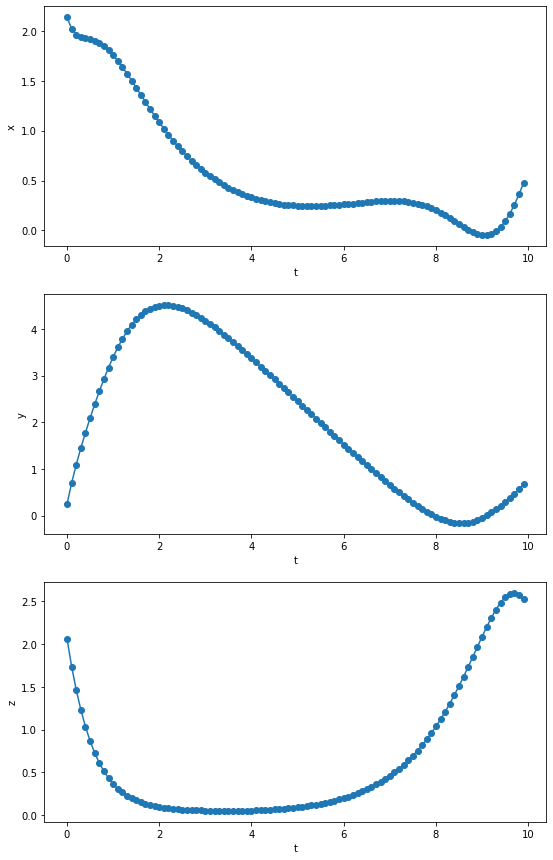

In [4]:
def heun(initial_values, f, t0, t1, dt):
    t = np.arange(t0, t1, dt)
    y = np.zeros((len(t), len(initial_values)))
    y[0] = initial_values
    for i in range(1, len(t)):
        k1 = f(y[i-1])
        k2 = f(y[i-1] + k1 * dt)
        y[i] = y[i-1] + (k1 + k2) * dt / 2
    return t, y
print("solution to the ODE using Heun's Method")
heun_t, heun_y = heun([INITIAL_X, INITIAL_Y, INITIAL_Z], dfxyz, 0, 10, 0.1)
print(heun_y)
fig,ax = plt.subplots(3,1,figsize=(9,15))
ax[0].plot(heun_t,heun_y[:,0],marker='o')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[1].plot(heun_t,heun_y[:,1],marker='o')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[2].plot(heun_t,heun_y[:,2],marker='o')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')


Runge Kutta Method

solution to the ODE using Runge-Kutta 4
[[ 2.13645276e+00  2.48310029e-01  2.06165787e+00]
 [ 2.01982173e+00  7.08774221e-01  1.73169033e+00]
 [ 1.96494810e+00  1.10619580e+00  1.45585331e+00]
 [ 1.94115177e+00  1.46378011e+00  1.22282611e+00]
 [ 1.93001147e+00  1.79486335e+00  1.02546952e+00]
 [ 1.92048444e+00  2.10666753e+00  8.58770041e-01]
 [ 1.90620224e+00  2.40241892e+00  7.18708702e-01]
 [ 1.88384787e+00  2.68277571e+00  6.01743526e-01]
 [ 1.85211354e+00  2.94688996e+00  5.04625854e-01]
 [ 1.81099435e+00  3.19320657e+00  4.24370602e-01]
 [ 1.76129224e+00  3.42003526e+00  3.58279064e-01]
 [ 1.70426311e+00  3.62592287e+00  3.03964573e-01]
 [ 1.64136835e+00  3.80985990e+00  2.59362128e-01]
 [ 1.57410557e+00  3.97136057e+00  2.22719257e-01]
 [ 1.50389954e+00  4.11045573e+00  1.92572356e-01]
 [ 1.43203816e+00  4.22763255e+00  1.67714467e-01]
 [ 1.35964094e+00  4.32374789e+00  1.47159805e-01]
 [ 1.28764954e+00  4.39993413e+00  1.30108831e-01]
 [ 1.21683276e+00  4.45750946e+00  1.15916

Text(0, 0.5, 'z')

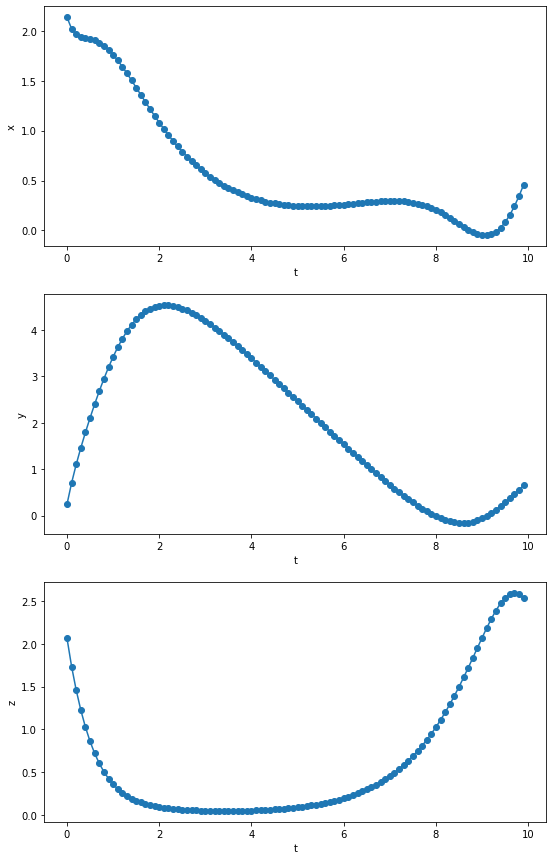

In [5]:
def runge_kutta4(initial_values, f, t0, t1, dt):
    t = np.arange(t0, t1, dt)
    y = np.zeros((len(t), len(initial_values)))
    y[0] = initial_values
    for i in range(1, len(t)):
        k1 = f(y[i-1])
        k2 = f(y[i-1] + k1 * dt/2)
        k3 = f(y[i-1] + k2 * dt/2)
        k4 = f(y[i-1] + k3 * dt)
        y[i] = y[i-1] + (k1+2*k2+2*k3+k4)*dt/6
    return t, y
print("solution to the ODE using Runge-Kutta 4")
rk4_t, rk4_y = runge_kutta4([INITIAL_X, INITIAL_Y, INITIAL_Z], dfxyz, 0, 10, 0.1)
print(rk4_y)
fig,ax = plt.subplots(3,1,figsize=(9,15))
ax[0].plot(rk4_t,rk4_y[:,0],marker='o')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[1].plot(rk4_t,rk4_y[:,1],marker='o')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[2].plot(rk4_t,rk4_y[:,2],marker='o')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')


#### **Visualization**
    
Also make three subplots showing how the estimated values of $x$, $y$ and $z$ change over time using each method.


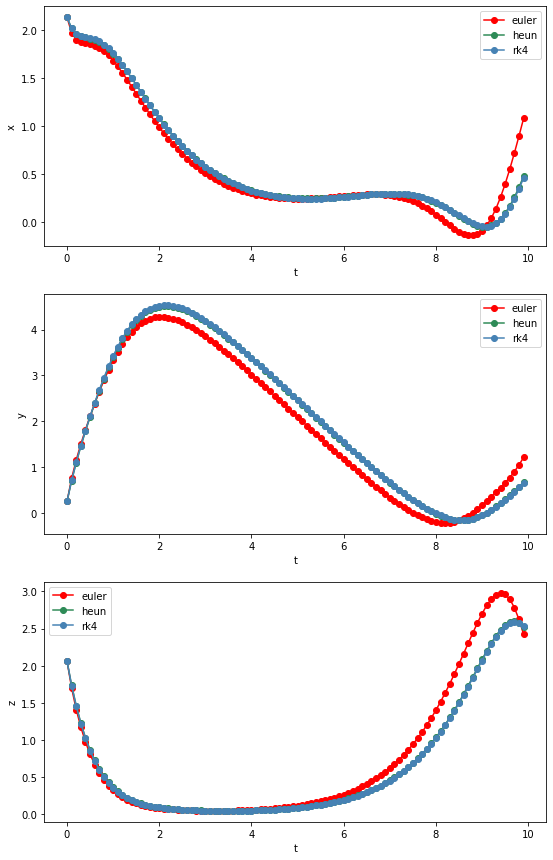

In [6]:
fig,ax = plt.subplots(3,1,figsize=(9,15))
ax[0].plot(euler_t,euler_y[:,0],marker='o',label='euler',color='red')
ax[0].plot(heun_t,heun_y[:,0],marker='o',label='heun',color='seagreen')
ax[0].plot(rk4_t,rk4_y[:,0],marker='o',label='rk4',color='steelblue')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].legend()
ax[1].plot(euler_t,euler_y[:,1],marker='o',label='euler',color='red')
ax[1].plot(heun_t,heun_y[:,1],marker='o',label='heun',color='seagreen')
ax[1].plot(rk4_t,rk4_y[:,1],marker='o',label='rk4',color='steelblue')
ax[1].set_xlabel('t')
ax[1].set_ylabel('y')
ax[1].legend()
ax[2].plot(euler_t,euler_y[:,2],marker='o',label='euler',color='red')
ax[2].plot(heun_t,heun_y[:,2],marker='o',label='heun',color='seagreen')
ax[2].plot(rk4_t,rk4_y[:,2],marker='o',label='rk4',color='steelblue')
ax[2].set_xlabel('t')
ax[2].set_ylabel('z')
ax[2].legend()
plt.show()



### **Fixed Point Iteration Method**

Fixed Point Iteration is a method of computing fixed points of iterated functions. For a function $ g(x) $, a point $ x $ is called a fixed point if $ g(x) = x $. In the context of root finding, we can manipulate the root-finding problem $ f(x) = 0 $ into a fixed point problem $ x = g(x) $ and use Fixed Point Iteration to solve it.

You are provided with the following iterative functions derived from the equation $ f(x) = x^2 - 3x + 2 $:
1. $ g_1(x) = \frac{1}{3}x^2 + \frac{2}{3} $
2. $ g_2(x) = \sqrt{3x - 2} $
3. $ g_3(x) = 3 - \frac{2}{x} $


Analyze the convergence criterion by evaluating the derivative of each $ g_i(x) $ at the root $ x = 2 $. A sufficient condition for local convergence of the method is $ |g'_i(x)| < 1 $ at the fixed point.



**Fixed Point Iteration**:
   - Implement the Fixed Point Iteration method using each $ g_i(x) $. The method should iterate until the absolute difference between successive iterations is less than $10^{-6}$ or until a maximum number of iterations is reached.
    Choose the starting value of $x$ to be $x0 = 3$.

In [12]:
from numpy import sqrt
def fixed_point(f, x0, tolerance, max_iterations):
    xvals = [x0]
    x = x0
    diverged = False
    for i in range(max_iterations):
        x = f(x)
        xvals.append(x)
        if abs(x-x0) < tolerance:
            break
        if x > 1e10:
            return xvals,i,True
            break
        x0 = x
    return xvals,i,diverged

g1 = lambda x: 1/3*x**2 + 2/3
g2 = lambda x: sqrt(3*x-2)
g3 = lambda x: 3-2/x
x0=3
xvals1,iterations1,diverged1 = fixed_point(g1,x0,1e-6,100)
xvals2,iterations2,diverged2 = fixed_point(g2,x0,1e-6,100)
xvals3,iterations3,diverged3 = fixed_point(g3,x0,1e-6,100)

print(f"Fixed point algorithm for g1(x) = {xvals1[-1]} after {iterations1} iterations, diverged = {diverged1}")
print(f"Fixed point algorithm for g2(x) = {xvals2[-1]} after {iterations2} iterations, diverged = {diverged2}")
print(f"Fixed point algorithm for g3(x) = {xvals3[-1]} after {iterations3} iterations, diverged = {diverged3}")

Fixed point algorithm for g1(x) = 4.546857525521987e+16 after 7 iterations, diverged = True
Fixed point algorithm for g2(x) = 2.000002505145324 after 42 iterations, diverged = False
Fixed point algorithm for g3(x) = 2.000000953675226 after 18 iterations, diverged = False


We see that g1 has diverged

 **Visualization**:
   - Plot the values of $ x $ at each iteration to visualize the convergence or divergence for each function.

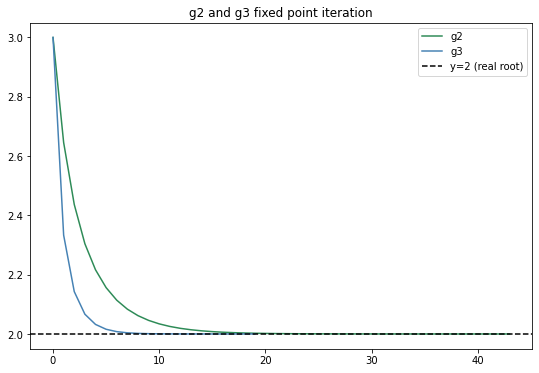

In [14]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(xvals2,label='g2',color='seagreen')
ax.plot(xvals3,label='g3',color='steelblue')
ax.axhline(2,color='black',linestyle='--',label='y=2 (real root)')
plt.title("g2 and g3 fixed point iteration")
ax.legend()
plt.show()

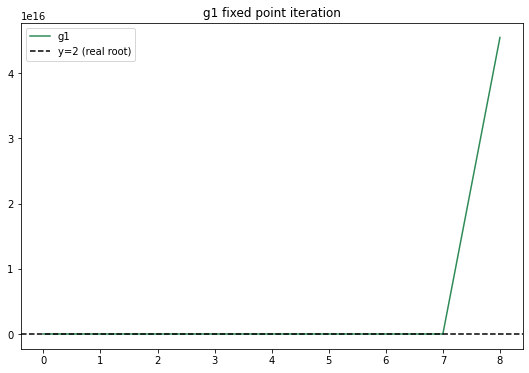

In [16]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(xvals1,label='g1',color='seagreen')
ax.axhline(2,color='black',linestyle='--',label='y=2 (real root)')
plt.title("g1 fixed point iteration")
ax.legend()
plt.show()


**Analysis and Discussion**:
   - Based on the derivative analysis, predict the convergence behavior for each $ g_i(x) $.
   - Compare your predictions with the actual iteration results obtained from your implementation.
   - Discuss any differences between the expected and actual behavior.

## Your Explanation

* g1

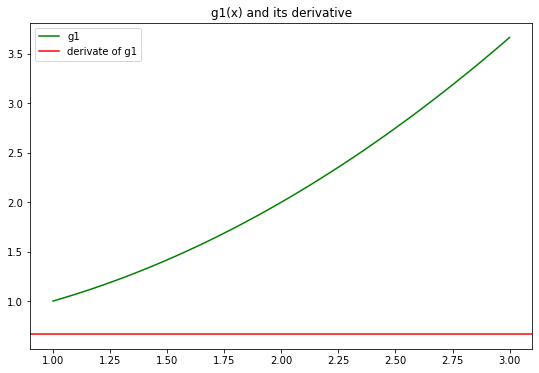

In [17]:
dg1 = lambda x: 2/3*x
#plot d for x between 1 to 3
x = np.linspace(1,3,100)
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(x,g1(x),color='green', label='g1')
ax.axhline(2/3,color='red',linestyle='-',label='derivate of g1')
ax.legend()
ax.set_title('g1(x) and its derivative')
plt.show()

First one $ g_1(x) = \frac{1}{3}x^2 + \frac{2}{3} $
</br>
We have that $ g_1'(x) = \frac{2}{3}x $
</br>
for the values between $[1,3]$ so $g_1'(x) = \frac{2}{3}x \geq 2*\frac{2}{3} = \frac{4}{3} > 1$ so the algorithm diverges.
</br>
We see that the plot diverges too.



In [19]:
print(g1(2))
print(g1(3))
print(dg1(2))
print(dg1(3))

2.0
3.6666666666666665
1.3333333333333333
2.0


* g2

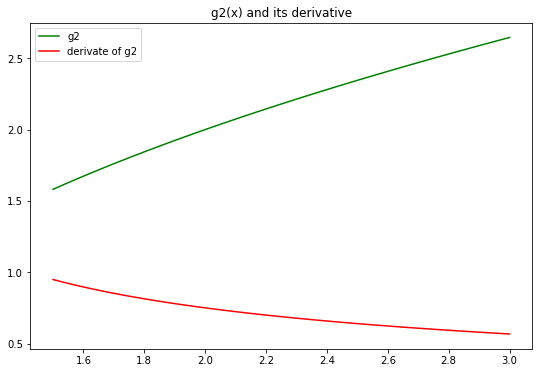

In [20]:
dg2 = lambda x: 3/(2*sqrt(3*x-2))
x = np.linspace(1.5,3,100)
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(x,g2(x),color='green', label='g2')
ax.plot(x,dg2(x),color='red',label='derivate of g2')
ax.legend()
ax.set_title('g2(x) and its derivative')
plt.show()

Second one $ g_2(x) = \sqrt{3x - 2} $
</br>
We have that $ g_2'(x) = \frac{3}{2\sqrt{3x-2}} $
</br>
for the values between $[1.5,3]$ so  $g_2(x)$ is between $[g2(1),g2(3)] \rightarrow [1.581, 2.645]$. This makes sense with what we expect from the algorithm. The function board is withing its range.
</br>
for the values between $[.5,3]$ so $g_2'(x) = \frac{3}{2\sqrt{3x-2}} \in (0.566,0.949) < 1$ so the algorithm converges.
</br>

In [21]:
print(g2(1.5))
print(g2(3))
print(dg2(1.5))
print(dg2(3))

1.5811388300841898
2.6457513110645907
0.9486832980505138
0.5669467095138409


* g3

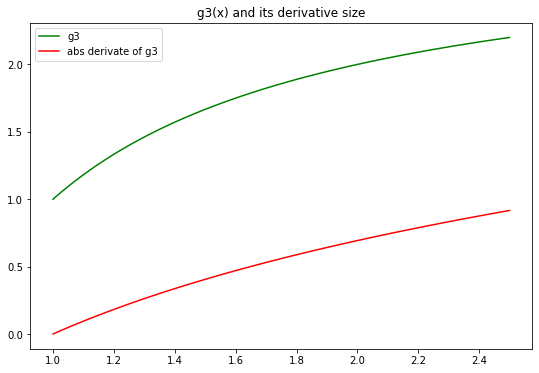

In [22]:
from numpy import log
# abs of log
dg3 = lambda x: log(x)
x = np.linspace(1,2.5,100)
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(x,g3(x),color='green', label='g3')
ax.plot(x,dg3(x),color='red',label='abs derivate of g3')
ax.legend()
ax.set_title('g3(x) and its derivative size')
plt.show()

Second one $ g_3(x) = 3 - \frac{2}{x} $
</br>
We have that $ |g_3'(x)| = |-ln(x)|=ln(x) $
</br>
for the values between $[1,2.5]$ so  $g_3(x)$ is between $[g3(1),g3(2.5)] \rightarrow [1,2.2]$. This makes sense with what we expect from the algorithm. The function board is withing its range.
</br>
for the values between $[1,2.5]$ so $|g_3'(x)| = ln(x) \in (0,0.9163) < 1$ so the algorithm converges.
</br>

In [23]:
print(g3(1))
print(g3(2.5))
print(log(1))
print(log(2.5))

1.0
2.2
0.0
0.9162907318741551
